<a href="https://colab.research.google.com/github/wiltoncarvalho40/Wilton-Computacional/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def Regra_Trapezio (a = 0, b = 0, c= 0, d = 0, e = 0, f = 0,
                    x_i = 0, x_f = 0, passo = 0,
                    plot = False, Salvar_png = False, dpi = 1200, Salvar_pdf = False, Diretorio = '/content/'):
    N_subintervalos = int(round((x_f - x_i) / passo))
    intervalo = []

    for i in range(N_subintervalos + 1):
        intervalo.append(x_i + i * passo)


    fxi = []
    elementos_trapezio = []


    for i in range(N_subintervalos):
        x0 = intervalo[i]
        x1 = intervalo[i+1]


        f_x0 = a*x0**5 + b*x0**4 + c*x0**3 + d*x0**2 + e*x0 + f
        f_x1 = a*x1**5 + b*x1**4 + c*x1**3 + d*x1**2 + e*x1 + f

        area_trap = 0.5 * (f_x0 + f_x1) * passo
        elementos_trapezio.append(area_trap)


        if i == 0:
            fxi.append(f_x0)


    fxi = [a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f for x in intervalo]

    somatoria = sum(elementos_trapezio)


    integral_xi = (a/6)*x_i**6 + (b/5)*x_i**5 + (c/4)*x_i**4 + (d/3)*x_i**3 + (e/2)*x_i**2 + f*x_i
    integral_xf = (a/6)*x_f**6 + (b/5)*x_f**5 + (c/4)*x_f**4 + (d/3)*x_f**3 + (e/2)*x_f**2 + f*x_f
    integral_analitica = integral_xf - integral_xi

    dicionario = {
        'Intervalo': intervalo,
        'f(x)': fxi,
        'Integral Numérica': somatoria,
        'Integral Analítica': integral_analitica}

    if plot == True:

      import matplotlib.pyplot as plt

      plt.figure(figsize=(10,6))
      plt.plot(intervalo, fxi, 'b',
                label = rf'$f (x) = {a}x^5 + {b}x^4 + {c}x^3 + {d}x^2 + {e}x + {f}$')


      for i in range(len(intervalo) - 1):
          x0 = intervalo[i]
          x1 = intervalo[i+1]
          y0 = a*x0**5 + b*x0**4 + c*x0**3 + d*x0**2 + e*x0 + f
          y1 = a*x1**5 + b*x1**4 + c*x1**3 + d*x1**2 + e*x1 + f


          plt.plot([x0, x0], [0, y0], 'k', linewidth=1)
          plt.plot([x1, x1], [0, y1], 'k', linewidth=1)
          plt.plot([x0, x1], [y0, y1], 'k', linewidth=3)
          plt.plot([x0, x1], [0, 0], 'k', linewidth=1)
          plt.fill_between([x0, x1], [y0, y1], [0,0], alpha=0.2)

      plt.text(0.3, 0.15, rf'$∫_{{{x_i}}}^{{{x_f}}} f(x)\, dx \approx {somatoria:.2f}$',
                transform=plt.gca().transAxes,
                fontsize=12,
                verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))


      plt.title('Integração Numérica - Regra do Trapézio')
      plt.xlabel(r'$x$')
      plt.ylabel(r'$f(x)$')
      plt.legend()
      if Salvar_png == True:
        plt.savefig(Diretorio + 'integracao_trapezio.png', dpi = dpi)
      elif Salvar_pdf == True:
        plt.savefig(Diretorio + 'integracao_trapezio.pdf')
      plt.show()

    return dicionario

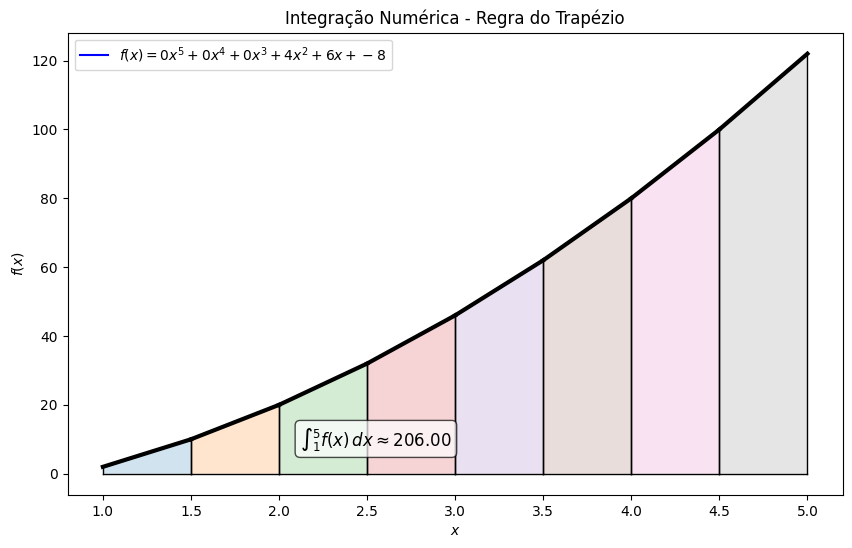

In [ ]:
resultado = Regra_Trapezio(        d = 4,     e = 6,     f = -8,     x_i = 1,     x_f = 5,     passo = 0.5,     plot = True )

In [ ]:
resultado

{'Intervalo': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
 'f(x)': [2.0, 10.0, 20.0, 32.0, 46.0, 62.0, 80.0, 100.0, 122.0],
 'Integral Numérica': 206.0,
 'Integral Analítica': 205.33333333333331}

In [ ]:
import matplotlib.pyplot as plt

def Regra_Trapezio (a = 0, b = 0, c= 0, d = 0, e = 0, f = 0,
                    x_i = 0, x_f = 0, passo = 0,
                    plot = False, Salvar_png = False, dpi = 1200, Salvar_pdf = False, Diretorio = r'/content/'):

    try:
        N_subintervalos = int(round((x_f - x_i) / passo))
    except ZeroDivisionError:
        print("Erro: O 'passo' não pode ser zero.")
        return None

    if N_subintervalos <= 0:
        print("Erro: O 'passo' é muito grande ou x_f não é maior que x_i.")
        return None

    intervalo = []
    for i in range(N_subintervalos + 1):
        intervalo.append(x_i + i * passo)

    elementos_trapezio = []

    f_x = lambda x: a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

    for i in range(N_subintervalos):
        x0 = intervalo[i]
        x1 = intervalo[i+1]

        f_x0 = f_x(x0)
        f_x1 = f_x(x1)

        area_trap = 0.5 * (f_x0 + f_x1) * passo
        elementos_trapezio.append(area_trap)

    somatoria = sum(elementos_trapezio)

    def integral_primitiva(x):
        return (a/6)*x**6 + (b/5)*x**5 + (c/4)*x**4 + (d/3)*x**3 + (e/2)*x**2 + f*x

    integral_analitica = integral_primitiva(x_f) - integral_primitiva(x_i)

    fxi = [f_x(x) for x in intervalo]

    dicionario = {
        'Intervalo': intervalo,
        'f(x)': fxi,
        'Integral Numérica': somatoria,
        'Integral Analítica': integral_analitica}

    if plot == True:
      plt.figure(figsize=(10,6))

      # --- Início da Lógica de Legenda Dinâmica ---
      termos_str = []

      if a != 0: termos_str.append(f"{a}x^5")
      if b != 0: termos_str.append(f"{b:+}x^4")
      if c != 0: termos_str.append(f"{c:+}x^3")
      if d != 0: termos_str.append(f"{d:+}x^2")
      if e != 0: termos_str.append(f"{e:+}x")
      if f != 0: termos_str.append(f"{f:+}")

      if not termos_str:
          label_final = "0"
      else:
          label_final = " ".join(termos_str)
          label_final = label_final.replace(" + ", " + ").replace(" - ", " - ")

          if label_final.startswith("+ "):
              label_final = label_final[2:]
          if label_final.startswith("- "):
              label_final = "-" + label_final[2:]

          label_final = label_final.replace("+ 1x", "+ x").replace("- 1x", "- x")
          if label_final.startswith("1x"):
                label_final = "x" + label_final[2:]

      label_plot = rf'$f(x) = {label_final}$'
      # --- Fim da Lógica de Legenda Dinâmica ---

      plt.plot(intervalo, fxi, 'b', label = label_plot)

      for i in range(N_subintervalos):
          x0 = intervalo[i]
          x1 = intervalo[i+1]
          y0 = fxi[i]
          y1 = fxi[i+1]

          plt.plot([x0, x0], [0, y0], 'k', linewidth=1)
          plt.plot([x1, x1], [0, y1], 'k', linewidth=1)
          plt.plot([x0, x1], [y0, y1], 'k', linewidth=3)
          plt.plot([x0, x1], [0, 0], 'k', linewidth=1)
          plt.fill_between([x0, x1], [y0, y1], [0,0], alpha=0.2)

      plt.text(0.3, 0.15, rf'$\int_{{{x_i}}}^{{{x_f}}} f(x)\, dx \approx {somatoria:.4f}$',
                transform=plt.gca().transAxes,
                fontsize=12,
                verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))

      plt.title('Integração Numérica - Regra do Trapézio')
      plt.xlabel(r'$x$')
      plt.ylabel(r'$f(x)$')
      plt.grid(True)
      plt.legend()

      if Salvar_png == True:
        plt.savefig(Diretorio + 'integracao_trapezio.png', dpi = dpi)
      elif Salvar_pdf == True:
        plt.savefig(Diretorio + 'integracao_trapezio.pdf')

      plt.show()

    return dicionario

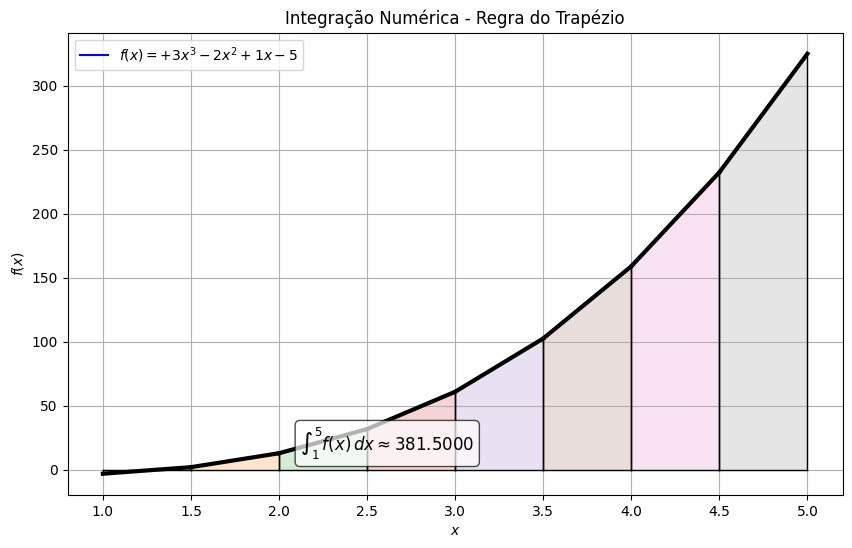

In [ ]:
resultado = Regra_Trapezio(     c = 3,     d = -2,     e = 1,     f = -5,     x_i = 1,     x_f = 5,     passo = 0.5,     plot = True )


In [ ]:
import matplotlib.pyplot as plt


def Calcula_Derivadas (a = 0, b = 0, c= 0, d = 0, e = 0, f = 0,
                       x_i = 0, x_f = 0, passo = 0,
                       plot = False, Salvar_png = False, dpi = 1200, Salvar_pdf = False, Diretorio = r'/content/'):

    # 1. Definição do número de pontos
    try:
        N_subintervalos = int(round((x_f - x_i) / passo))
    except ZeroDivisionError:
        print("Erro: O 'passo' não pode ser zero.")
        return None

    intervalo = []
    for i in range(N_subintervalos + 1):
        intervalo.append(x_i + i * passo)

    y_original = []
    y_derivada1 = []
    y_derivada2 = []

    for x in intervalo:
        val_f = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
        val_d1 = 5*a*x**4 + 4*b*x**3 + 3*c*x**2 + 2*d*x + e
        val_d2 = 20*a*x**3 + 12*b*x**2 + 6*c*x + 2*d

        y_original.append(val_f)
        y_derivada1.append(val_d1)
        y_derivada2.append(val_d2)

    dicionario = {
        'Intervalo': intervalo,
        'f(x)': y_original,
        "f'(x)": y_derivada1,
        "f''(x)": y_derivada2
    }

    # 2. Plotagem
    if plot == True:
        plt.figure(figsize=(10,6))


        plt.plot(intervalo, y_original, 'b-', linewidth=2,
                 label=rf'$f(x) = {a}x^5 + {b}x^4 + {c}x^3 + {d}x^2 + {e}x + {f}$')


        plt.plot(intervalo, y_derivada1, 'r--', linewidth=1.5,
                 label=rf"$f'(x) = {5*a}x^4 + {4*b}x^3 + {3*c}x^2 + {2*d}x + {e}$")


        plt.plot(intervalo, y_derivada2, 'g:', linewidth=1.5,
                 label=rf"$f''(x) = {20*a}x^3 + {12*b}x^2 + {6*c}x + {2*d}$")

        plt.title('Função e suas Derivadas')
        plt.xlabel(r'$x$')
        plt.ylabel(r'$y$')
        plt.grid(True, alpha=0.3)
        plt.legend()

        if Salvar_png == True:
            plt.savefig(Diretorio + 'derivadas_com_zeros.png', dpi = dpi)
        elif Salvar_pdf == True:
            plt.savefig(Diretorio + 'derivadas_com_zeros.pdf')

        plt.show()

    return dicionario

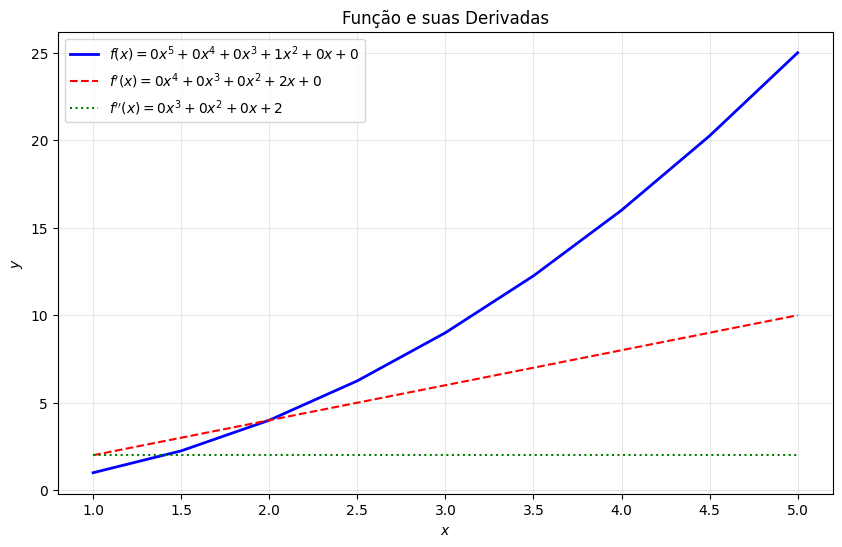

{'Intervalo': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
 'f(x)': [1.0, 2.25, 4.0, 6.25, 9.0, 12.25, 16.0, 20.25, 25.0],
 "f'(x)": [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 "f''(x)": [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]}

In [ ]:
Calcula_Derivadas(
    a = 0,
    b = 0,
    c = 0,       # 3x³
    d = 1,      # -2x²
    e = 0,       # +x
    f = 0,      # -5
    x_i = 1,    # Início do gráfico (exemplo)
    x_f = 5,     # Fim do gráfico (exemplo)
    passo = 0.5, # Precisão
    plot = True
)

In [ ]:
import matplotlib.pyplot as plt

def Calcula_Derivadas_Sem_Zeros (a = 0, b = 0, c= 0, d = 0, e = 0, f = 0,
                                 x_i = 0, x_f = 0, passo = 0,
                                 plot = False, Salvar_png = False, dpi = 1200, Salvar_pdf = False, Diretorio = r'/content/'):

    try:
        N_subintervalos = int(round((x_f - x_i) / passo))
    except ZeroDivisionError:
        print("Erro: O 'passo' não pode ser zero.")
        return None

    intervalo = []
    for i in range(N_subintervalos + 1):
        intervalo.append(x_i + i * passo)

    y_original = []
    y_derivada1 = []
    y_derivada2 = []

    for x in intervalo:
        y_original.append(a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f)
        y_derivada1.append(5*a*x**4 + 4*b*x**3 + 3*c*x**2 + 2*d*x + e)
        y_derivada2.append(20*a*x**3 + 12*b*x**2 + 6*c*x + 2*d)

    dicionario = {
        'Intervalo': intervalo,
        'f(x)': y_original,
        "f'(x)": y_derivada1,
        "f''(x)": y_derivada2
    }

    if plot == True:
        plt.figure(figsize=(10,6))

        # --- Lógica de Legenda para f(x) ---
        termos_f = []
        if a!=0: termos_f.append(f"{a}x^5")
        if b!=0: termos_f.append(f"{b:+}x^4")
        if c!=0: termos_f.append(f"{c:+}x^3")
        if d!=0: termos_f.append(f"{d:+}x^2")
        if e!=0: termos_f.append(f"{e:+}x")
        if f!=0: termos_f.append(f"{f:+}")
        lbl_f = " ".join(termos_f).replace("+ 1x", "+ x").replace("- 1x", "- x") if termos_f else "0"
        if lbl_f.startswith("+"): lbl_f = lbl_f[1:]

        # --- Lógica de Legenda para f'(x) ---
        termos_d1 = []
        # Coeficientes: 5a, 4b, 3c, 2d, e
        c1, c2, c3, c4, c5 = 5*a, 4*b, 3*c, 2*d, e
        if c1!=0: termos_d1.append(f"{c1}x^4")
        if c2!=0: termos_d1.append(f"{c2:+}x^3")
        if c3!=0: termos_d1.append(f"{c3:+}x^2")
        if c4!=0: termos_d1.append(f"{c4:+}x")
        if c5!=0: termos_d1.append(f"{c5:+}")
        lbl_d1 = " ".join(termos_d1).replace("+ 1x", "+ x").replace("- 1x", "- x") if termos_d1 else "0"
        if lbl_d1.startswith("+"): lbl_d1 = lbl_d1[1:]

        # --- Lógica de Legenda para f''(x) ---
        termos_d2 = []
        # Coeficientes: 20a, 12b, 6c, 2d
        k1, k2, k3, k4 = 20*a, 12*b, 6*c, 2*d
        if k1!=0: termos_d2.append(f"{k1}x^3")
        if k2!=0: termos_d2.append(f"{k2:+}x^2")
        if k3!=0: termos_d2.append(f"{k3:+}x")
        if k4!=0: termos_d2.append(f"{k4:+}")
        lbl_d2 = " ".join(termos_d2).replace("+ 1x", "+ x").replace("- 1x", "- x") if termos_d2 else "0"
        if lbl_d2.startswith("+"): lbl_d2 = lbl_d2[1:]

        # Plotagem
        plt.plot(intervalo, y_original, 'b-', linewidth=2, label=rf'$f(x) = {lbl_f}$')
        plt.plot(intervalo, y_derivada1, 'r--', linewidth=1.5, label=rf"$f'(x) = {lbl_d1}$")
        plt.plot(intervalo, y_derivada2, 'g:', linewidth=1.5, label=rf"$f''(x) = {lbl_d2}$")

        plt.title('Função e suas Derivadas')
        plt.xlabel(r'$x$')
        plt.ylabel(r'$y$')
        plt.grid(True, alpha=0.3)
        plt.legend()

        if Salvar_png == True:
            plt.savefig(Diretorio + 'derivadas_limpas.png', dpi = dpi)
        elif Salvar_pdf == True:
            plt.savefig(Diretorio + 'derivadas_limpas.pdf')

        plt.show()

    return dicionario

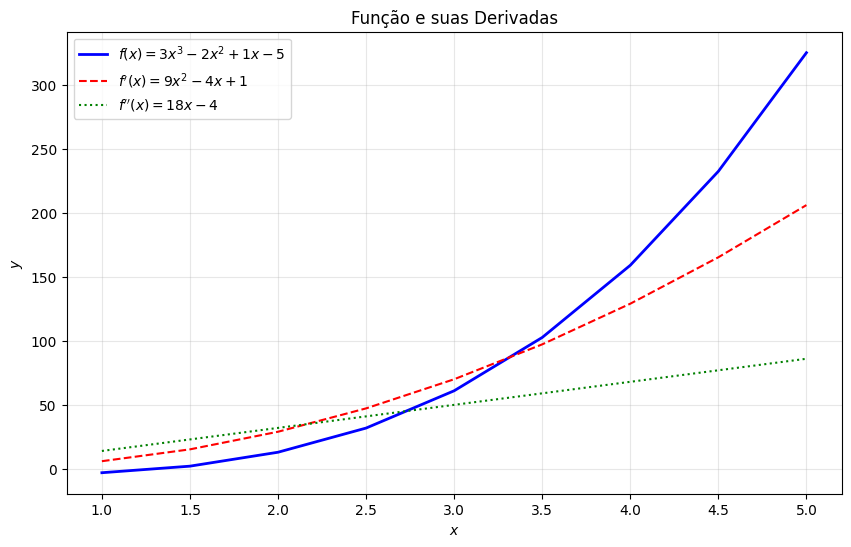

{'Intervalo': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
 'f(x)': [-3.0, 2.125, 13.0, 31.875, 61.0, 102.625, 159.0, 232.375, 325.0],
 "f'(x)": [6.0, 15.25, 29.0, 47.25, 70.0, 97.25, 129.0, 165.25, 206.0],
 "f''(x)": [14.0, 23.0, 32.0, 41.0, 50.0, 59.0, 68.0, 77.0, 86.0]}

In [ ]:
# Lembre-se:
# c = termo x³
# d = termo x²
# e = termo x
# f = termo sozinho (constante)

Calcula_Derivadas_Sem_Zeros(
    a = 0,
    b = 0,
    c = 3,       # 3x³
    d = -2,      # -2x²
    e = 1,       # +x
    f = -5,      # -5
    x_i = 1,    # Início do gráfico (exemplo)
    x_f = 5,     # Fim do gráfico (exemplo)
    passo = 0.5, # Precisão
    plot = True
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Regressao_Linear_Matriz(x_dados, y_dados,
                            plot=False, Salvar_png=False, dpi=1200, Salvar_pdf=False, Diretorio='/content/'):

    y = np.array(y_dados).reshape(-1, 1)
    x = np.array(x_dados)

    X_matriz = np.column_stack((np.ones(len(x)), x))


    X_T = X_matriz.T                    # Transposta de X
    X_T_X = X_T @ X_matriz              # Multiplicação X^T por X
    X_T_X_inv = np.linalg.inv(X_T_X)    # Inversa de (X^T * X)
    X_T_y = X_T @ y                     # X^T por y

    Beta = X_T_X_inv @ X_T_y            # Resultado final

    #
    coef_linear = Beta[0][0]
    coef_angular = Beta[1][0]


    y_pred = X_matriz @ Beta


    y_media = np.mean(y)
    sq_residuos = np.sum((y - y_pred) ** 2)
    sq_total = np.sum((y - y_media) ** 2)
    r_quadrado = 1 - (sq_residuos / sq_total)

    dicionario = {
        'Coeficiente Linear (b)': coef_linear,
        'Coeficiente Angular (a)': coef_angular,
        'R^2': r_quadrado,
        'y_pred': y_pred.flatten().tolist()
    }


    if plot == True:
        plt.figure(figsize=(10, 6))


        plt.scatter(x, y, color='red', label='Dados Observados')


        plt.plot(x, y_pred, color='blue', linewidth=2,
                 label=rf'Ajuste: $y = {coef_angular:.4f}x + {coef_linear:.4f}$')


        for i in range(len(x)):
            plt.plot([x[i], x[i]], [y[i], y_pred[i]], 'gray', linestyle='--', alpha=0.5)

        plt.text(0.05, 0.95, rf'$R^2 = {r_quadrado:.4f}$',
                 transform=plt.gca().transAxes, fontsize=12,
                 verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

        plt.title('Regressão Linear por Matrizes')
        plt.xlabel('Eixo X')
        plt.ylabel('Eixo Y')
        plt.legend()
        plt.grid(True, alpha=0.3)

        if Salvar_png == True:
            plt.savefig(Diretorio + 'regressao_linear.png', dpi=dpi)
        elif Salvar_pdf == True:
            plt.savefig(Diretorio + 'regressao_linear.pdf')

        plt.show()

    return dicionario

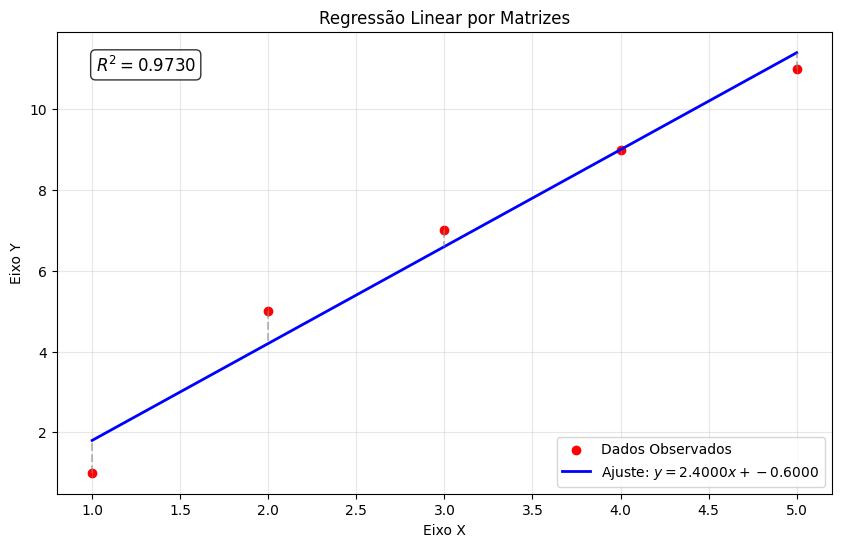

{'Coeficiente Linear (b)': np.float64(-0.5999999999999952),
 'Coeficiente Angular (a)': np.float64(2.400000000000001),
 'R^2': np.float64(0.9729729729729729),
 'y_pred': [1.8000000000000056,
  4.200000000000006,
  6.600000000000008,
  9.000000000000007,
  11.40000000000001]}

In [ ]:
x = [1, 2, 3, 4, 5]
y = [1, 5, 7, 9, 11]
Regressao_Linear_Matriz(x, y, plot=True)